<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/pyompa_dev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cvxpy as cp

In [ ]:
!pip install gsw

     |████████████████████████████████| 2.4MB 4.3MB/s 


In [2]:
import gsw

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ' -O names_added_GP15OMPA_33RR20180918_only_gs_rosette_clean1_hy1.csv

--2021-06-14 07:52:50--  https://docs.google.com/uc?export=download&id=1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ
Resolving docs.google.com (docs.google.com)... 2607:f8b0:4005:807::200e, 216.58.195.78
Connecting to docs.google.com (docs.google.com)|2607:f8b0:4005:807::200e|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/an52jivkahgopal81psl2uk1ar7c9hu2/1623682350000/06203730782251856755/*/1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ?e=download [following]
--2021-06-14 07:52:50--  https://doc-0s-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/an52jivkahgopal81psl2uk1ar7c9hu2/1623682350000/06203730782251856755/*/1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ?e=download
Resolving doc-0s-a4-docs.googleusercontent.com (doc-0s-a4-docs.googleusercontent.com)... 2607:f8b0:4005:807::2001, 142.250.191.33
Connecting to doc-0s-a4-docs.googleusercontent.com (doc-0s-a4-d

In [4]:
!pip uninstall -y pyompa
%cd /content/
!rm -rf pyompa
!git clone https://github.com/nitrogenlab/pyompa
%cd /content/pyompa
!git checkout dev
!git log -1
!pip install .
%cd /content/

%reload_ext autoreload
%autoreload 2
from importlib import reload
import pyompa
reload(pyompa)

Found existing installation: pyompa 0.3.1.1
Uninstalling pyompa-0.3.1.1:
  Successfully uninstalled pyompa-0.3.1.1
[Errno 2] No such file or directory: '/content/'
/Users/avantishrikumar/Research/GP15_watermassanalysis
Cloning into 'pyompa'...
remote: Enumerating objects: 918, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 918 (delta 145), reused 132 (delta 68), pack-reused 692
Receiving objects: 100% (918/918), 14.87 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (631/631), done.
[Errno 2] No such file or directory: '/content/pyompa'
/Users/avantishrikumar/Research/GP15_watermassanalysis
error: pathspec 'dev' did not match any file(s) known to git
commit 03040dce7029e1b066f400466ebca718a237cfe9 (HEAD -> main, origin/main, origin/HEAD)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Mon May 17 09:10:38 2021 -0700

    Created using Colaboratory
ERROR: Directory '.' is not installable. Neither 'setup.py' 

<module 'pyompa' from '/Users/avantishrikumar/Research/pyompa/pyompa/__init__.py'>

In [3]:
%reload_ext autoreload
%autoreload 2
from importlib import reload
import pyompa
reload(pyompa)

<module 'pyompa' from '/Users/avantishrikumar/Research/pyompa/pyompa/__init__.py'>

In [4]:
import pandas as pd
import numpy as np

def augment_df_with_PO_NO_SiO(df):  
    #remineralization ratios
    r_PO = 155;
    r_SiO = 15
    r_NO = 9.68
    df["PO"] = df["oxygen"] + df["phosphate"]*r_PO
    df["NO"] = df["oxygen"] + df["nitrate"]*r_NO
    df["SiO"] = df["oxygen"] + df["silicate"]*r_SiO
    return df

header = ["c"+str(i) for i in range(1,30)]
header[4] = "bottle flag"
header[16] = "bottle salinity flag"
header[20] = "bottle oxygen flag"
header[22] = "silicate flag"
header[24] = "nitrate flag"
header[28] = "phosphate flag"

header[11] = "CTD pressure"
header[12] = "CTD temperature"
header[15] = "practical_salinity" #practical salinity
header[8] = "lat"
header[9] = "lon"

header[0] = "stnnbr"
header[5] = "geotrc_ID"
header[10] = "bottom depth"
header[19] = "oxygen"
header[21] = "silicate"
header[23] = "nitrate"
header[27] = "phosphate"

gp15_df = pd.read_csv("names_added_GP15OMPA_33RR20180918_only_gs_rosette_clean1_hy1.csv",
                      names=header, na_values = -999)

#remove bad data
for flag_type in ["bottle flag", "bottle salinity flag", "bottle oxygen flag",
                  "silicate flag", "nitrate flag", "phosphate flag"]:
    gp15_df = gp15_df[gp15_df[flag_type] <= 2]
gp15_df = pd.DataFrame(gp15_df)

#create PO offset
#gp15_df["phosphate"] = gp15_df["phosphate"] - 0.2

#add PO and NO to data frame
augment_df_with_PO_NO_SiO(gp15_df)

absolute_salinity = gsw.SA_from_SP(SP=gp15_df["practical_salinity"],
                                   p=gp15_df["CTD pressure"],
                                   lon=gp15_df["lon"],
                                   lat=gp15_df["lat"])
gp15_df["absolute_salinity"] = absolute_salinity

conservative_temp = gsw.CT_from_t(SA=absolute_salinity,
                                  t=gp15_df["CTD temperature"],
                                  p=gp15_df["CTD pressure"])
gp15_df["conservative_temp"] = conservative_temp

potential_temp = gsw.pt_from_CT(SA=absolute_salinity,
                                CT=conservative_temp)
gp15_df["potential_temp"] = potential_temp

sig0 = gsw.rho(SA=absolute_salinity, CT=conservative_temp, p=0) - 1000
gp15_df["sigma0"] = sig0

z = gsw.z_from_p(p=gp15_df["CTD pressure"], lat=gp15_df["lat"])
depth = -z #https://github.com/TEOS-10/python-gsw/blob/7d6ebe8114c5d8b4a64268d36100a70e226afaf6/gsw/gibbs/conversions.py#L577
gp15_df["Depth"] = depth

spic0 = gsw.spiciness0(SA=absolute_salinity, CT=conservative_temp)
gp15_df["spiciness"] = spic0

#calculation of planetary vorticity
rho_ref = 1000.0 #reference density
Omega = 2*np.pi/86400;
f = np.mean(2*Omega*np.sin(gp15_df["lat"]*(np.pi/180.0)))
PV = -(f/rho_ref)*(np.gradient(sig0, depth))
gp15_df["PV"] = PV #potential vorticity

print("Rows:",len(gp15_df))
gp15_df = gp15_df.dropna()
print("Rows without NA values:",len(gp15_df))

Rows: 940
Rows without NA values: 926


/Users/avantishrikumar/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1061: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/avantishrikumar/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1062: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/avantishrikumar/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1063: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/avantishrikumar/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1069: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


In [29]:
gp15_df

stnnbr  c2  c3  c4  bottle flag  geotrc_ID        c7    c8      lat  \
0        1.0   3  36  36            2      12443  20180926  1231  56.0585   
2        1.0   3  24  24            2      12445  20180926  1231  56.0585   
3        1.0   3  18  18            2      12446  20180926  1231  56.0585   
4        1.0   3  13  13            2      12447  20180926  1231  56.0585   
5        1.0   3   7   7            2      12448  20180926  1231  56.0585   
...      ...  ..  ..  ..          ...        ...       ...   ...      ...   
1137    39.0  12  16  17            2      15844  20181123  1259 -20.0000   
1138    39.0  12  13  14            2      15845  20181123  1259 -20.0000   
1139    39.0  12  10  11            2      15846  20181123  1259 -20.0000   
1140    39.0  12   7   8            2      15847  20181123  1259 -20.0000   
1141    39.0  12   4   5            2      15848  20181123  1259 -20.0000   

           lon  ...      PO        NO      SiO  absolute_salinity  \
0    -156.9628  ...  352.55  305.6472   394.50          31.563603   
2    -156.9628  ...  383.61  327.3688   419.46          32.013385   
3    -156.9628  ...  401.95  344.6248   426.20          32.050711   
4    -156.9628  ...  411.28  352.4908   456.63          32.242302   
5    -156.9628  ...  432.26  376.1632   483.76          32.318352   
...        ...  ...     ...       ...      ...                ...   
1137 -151.9991  ...  527.97  500.5840  2005.57          34.847213   
1138 -151.9991  ...  531.52  500.3600  2032.57          34.857594   
1139 -151.9991  ...  536.65  502.5884  2010.05          34.864597   
1140 -151.9991  ...  539.28  504.0580  1998.18          34.868249   
1141 -151.9991  ...  536.76  503.1860  1992.91          34.868836   

      conservative_temp  potential_temp     sigma0        Depth  spiciness  \
0             10.686987       10.628914  24.052467     2.477227  -1.235624   
2              9.878690        9.832110  24.533620    30.715490  -1.050415   
3              8.757671        8.715846  24.737235    40.721797  -1.209639   
4              8.698515        8.659988  24.894944    50.133222  -1.080744   
5              7.362774        7.329704  25.144753    70.638720  -1.230846   
...                 ...             ...        ...          ...        ...   
1137           1.448263        1.448150  27.760561  3000.792840  -0.117884   
1138           1.297902        1.297724  27.779610  3401.198658  -0.122707   
1139           1.156410        1.156150  27.795069  3801.952551  -0.128901   
1140           1.102392        1.102104  27.801685  4107.626461  -0.130510   
1141           1.091563        1.091270  27.802891  4186.879292  -0.130929   

                PV  
0    -6.847071e-10  
2    -7.829064e-10  
3    -7.433318e-10  
4    -6.155510e-10  
5    -3.744648e-10  
...            ...  
1137 -2.062249e-12  
1138 -1.730980e-12  
1139 -1.164123e-12  
1140 -6.648035e-13  
1141 -6.116598e-13  

[926 rows x 39 columns]

In [6]:
!wget https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv -O GP15_intermediateanddeep_endmemberswithsubtypes.csv

--2021-05-17 09:11:59--  https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv [following]
--2021-05-17 09:11:59--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5567 (5.4K) [text/plain]
Saving to: ‘GP15_intermediateanddeep_endmemberswithsubtypes.csv’

GP15_intermediat

In [17]:
import pandas
endmember_df = pandas.read_csv("GP15_intermediateanddeep_endmemberswithsubtypes.csv")

endmember_df_onearchetype = pandas.read_csv("GP15_intermediateanddeep_endmemberswithsubtypes_onearchetype.csv")

#additional_rows = pandas.DataFrame(
#    {"watermass_name": ["PSUW", "ESSW"],
#     "conservative_temp": [4.03, 12.2],
#     "absolute_salinity": [33.38, 34.86],
#     "oxygen": [174.7, 84.6],
#     "phosphate": [1.87, 3.03],
#     "silicate": [21.58, 168.87],
#     "nitrate": [25.87, 43.5]
#    }
#)
endmember_df = augment_df_with_PO_NO_SiO(endmember_df)

In [6]:
endmember_df

watermass_name  conservative_temp  absolute_salinity    silicate  \
0          AABW_0           0.040809          34.885794  143.688715   
1          AABW_1          -1.750199          34.605130   79.132109   
2          AABW_2           0.262859          34.881773  126.124059   
3          AABW_3          -1.763688          34.561344   78.666995   
4          AAIW_0           5.134094          34.399466   11.743469   
5          AAIW_1           4.448646          34.385945   18.816000   
6          AAIW_2           4.852530          34.363488   12.330470   
7          AAIW_3           4.496576          34.413457   20.301646   
8          ESSW_0           8.076944          34.811425   48.673673   
9          ESSW_1          13.228972          35.094255   22.928494   
10         ESSW_2          11.013081          34.964406   33.929015   
11         ESSW_3          14.846701          35.177587   15.714335   
12         LCDW_0           1.361647          34.896377  102.877940   
13         LCDW_1           0.590204          34.866114  113.342022   
14         LCDW_2           1.411767          34.905967   91.997228   
15         LCDW_3           0.788288          34.886085  120.467493   
16         NPIW_0           6.008954          34.439011   81.761735   
17         NPIW_1           8.627183          34.441893   48.830724   
18         NPIW_2           4.339804          34.191017   89.081541   
19         NPIW_3           4.867881          34.112452   68.779929   
20         PDW1_0           2.048862          34.738475  165.652107   
21         PDW1_1           1.606045          34.812846  177.070089   
22         PDW1_2           2.037144          34.731860  168.400000   
23         PDW1_3           1.545778          34.816158  166.871545   
24       PDW2-3_0           1.551030          34.819681  171.676778   
25       PDW2-3_1           1.195686          34.867235  176.647820   
26       PDW2-3_2           1.199859          34.861032  156.579871   
27         PSUW_0           6.442442          32.613980   24.458015   
28         PSUW_1           4.313754          32.260443   23.400000   
29         PSUW_2           8.273771          32.905552   23.897095   
30         PSUW_3           9.801420          32.607529   10.662834   
31         UCDW_0           1.697792          34.852488  116.014783   
32         UCDW_1           3.427404          34.548697   46.708487   
33         UCDW_2           2.171625          34.805668   98.289035   
34         UCDW_3           2.784875          34.654062   65.372995   

      nitrate  phosphate      oxygen   latitude   longitude          PO  \
0   32.798847   2.272015  213.759415 -65.056130  -97.927064  565.921815   
1   29.376840   2.049985  305.810744 -65.889861  146.470058  623.558483   
2   32.540914   2.252332  210.986771 -62.432755 -101.220374  560.098195   
3   28.903203   2.160000  305.600000 -65.578000  148.670000  640.400000   
4   23.806924   1.653799  271.804540 -49.663867  -86.789071  528.143416   
5   26.990000   1.880000  254.600000 -54.004000  -85.544000  546.000000   
6   25.523492   1.790736  258.034167 -51.798753  -85.528909  535.598208   
7   28.539344   1.995244  229.632156 -49.062475  -88.456364  538.894951   
8   40.263802   2.932319   10.737921   1.792486  -86.242666  465.247290   
9   30.837586   2.181948   11.643493  -3.131225  -83.951298  349.845474   
10  32.639043   2.651282    1.886119  -1.876463  -86.008471  412.834851   
11  21.980018   1.610886   86.359508  -1.396847  -85.832302  336.046814   
12  33.294261   2.301304  173.844179 -62.875188 -149.999724  530.546356   
13  31.841137   2.251690  211.687789 -65.107747  145.836686  560.699815   
14  30.525574   2.128672  198.645333 -63.478032   85.990223  528.589542   
15  32.255047   2.236687  198.047810 -63.977518 -146.737507  544.734220   
16  33.854222   2.425117   92.132011  34.830455  140.356837  468.025111   
17  24.952866   1.773763  135.188123  34.770833  141.243261  410.121374   
18  36.601004   2.682

In [18]:
endmember_df_onearchetype

watermass_name  conservative_temp  absolute_salinity    silicate    nitrate  \
0         AABW_0           0.053452          34.868581  129.829152  32.438730   
1         AAIW_0           4.769847          34.391977   15.793043  26.295450   
2         ESSW_0          11.872971          35.012185   29.347713  31.471899   
3         LCDW_0           1.150074          34.895932  107.614829  32.041227   
4         NPIW_0           6.492952          34.342407   68.986533  31.036146   
5         PDW1_0           1.781175          34.780156  170.144319  42.054011   
6       PDW2-3_0           1.339260          34.846987  168.787061  38.689780   
7         PSUW_0           7.771406          32.691799   19.846911  11.409624   
8         UCDW_0           2.439804          34.736735   84.519983  34.052965   

   phosphate      oxygen   latitude   longitude  
0   2.251674  217.260536 -64.163506  -82.463230  
1   1.835972  251.592309 -51.545970  -87.215191  
2   2.304371   31.083172   0.128492  -85.844678  
3   2.226333  192.404472 -64.007372 -109.982139  
4   2.232461  114.775304  34.995945  143.494705  
5   2.968814   59.630571  46.739841 -145.771027  
6   2.715335  112.889610  46.520682 -145.425440  
7   1.185533  301.528708  51.899997 -146.282551  
8   2.385556  168.802396 -46.691874 -150.191206

In [23]:
from collections import OrderedDict

intermediateanddeep_settingtosoln = OrderedDict()

In [32]:
gp15_df.columns

Index(['stnnbr', 'c2', 'c3', 'c4', 'bottle flag', 'geotrc_ID', 'c7', 'c8',
       'lat', 'lon', 'bottom depth', 'CTD pressure', 'CTD temperature', 'c14',
       'c15', 'practical_salinity', 'bottle salinity flag', 'c18', 'c19',
       'oxygen', 'bottle oxygen flag', 'silicate', 'silicate flag', 'nitrate',
       'nitrate flag', 'c26', 'c27', 'phosphate', 'phosphate flag', 'PO', 'NO',
       'SiO', 'absolute_salinity', 'conservative_temp', 'potential_temp',
       'sigma0', 'Depth', 'spiciness', 'PV'],
      dtype='object')

In [34]:
gp15_df.apply(lambda x: x['stnnbr'], axis=1)

0        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
1137    39.0
1138    39.0
1139    39.0
1140    39.0
1141    39.0
Length: 926, dtype: float64

In [38]:
import pyompa
reload(pyompa)
from pyompa import OMPAProblem, EndMemExpPenaltyFunc
from collections import OrderedDict
import json

#gp15_intermediateanddeep = pd.DataFrame(gp15_df[(gp15_df["sigma0"] >= 26.6)])
station_to_tcstartend = json.loads(open("station_to_tc_cutoffs.json").read())
gp15_intermediateanddeep = gp15_df[
    gp15_df.apply(lambda x: x['Depth'] > station_to_tcstartend[str(int(x['stnnbr']))]['depth_cutoffs'][1], axis=1)]

convertedparamgroups_staticremineralization = [
    pyompa.ConvertedParamGroup(
        groupname="phosphate_remin",
        conversion_ratios=[{"oxygen": -155, "phosphate": 1.0, "nitrate": 16.0}],
        always_positive=False)
]

convertedparamgroups_flexibleremineralization = [
    pyompa.ConvertedParamGroup(
        groupname="phosphate_remin",
        conversion_ratios=[#Representing C:P = 66
                           {"oxygen": -155*(66.0/106.0),
                            "phosphate": 1.0,
                            "nitrate": 16.0*(66.0/106.0)},
                           #Representing C:P = 209
                           {"oxygen": -155*(209.0/106.0),
                            "phosphate": 1.0,
                            "nitrate": 16.0*(209.0/106.0)}
                          ],
        always_positive=False)
]

rian_weighting = {
    "conservative_temp": 56.0,
    "absolute_salinity": 80.0,
    "silicate": 3.0,
    "nitrate": 5.0,
    "phosphate": 5.0,
    "oxygen": 1.0,
    "NO": 1.0,
    "PO": 0.5
}

withconversion_paramnames = ["conservative_temp", "absolute_salinity",
                             "silicate", "nitrate", "phosphate", "oxygen"]
noconversion_paramnames = ["conservative_temp", "absolute_salinity",
                           "silicate", "NO", "PO"]  

flexiblereminratio_settings = {
    "param_names": withconversion_paramnames,
    "param_weightings": rian_weighting,
    "convertedparam_groups": convertedparamgroups_flexibleremineralization}

staticreminratio_settings = {
    "param_names": withconversion_paramnames,
    "param_weightings": rian_weighting,
    "convertedparam_groups": convertedparamgroups_staticremineralization}

noremin_settings = {
    "param_names": noconversion_paramnames,
    "param_weightings": rian_weighting,
    "convertedparam_groups": []}

endmember_usagepenalty = {
    "PSUW_0": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'lowerbound':10}}),
    "PSUW_1": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'lowerbound':10}}),
    "PSUW_2": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'lowerbound':10}}),
    "PSUW_3": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'lowerbound':10}}),

    "LCDW_0": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    "LCDW_1": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    "LCDW_2": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    "LCDW_3": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    
    "AABW_0": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    "AABW_1": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    "AABW_2": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    "AABW_3": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}})
}

endmember_usagepenalty_onearchetype = {
    "PSUW_0": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'lowerbound':10}}),
    "LCDW_0": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
    "AABW_0": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.72}}),
}


for setting_name, setting, endmember_df_touse, usagepenalty_touse in [
    ("flexiblereminratio_onearchetype", flexiblereminratio_settings, endmember_df_onearchetype, endmember_usagepenalty_onearchetype),
    ("flexiblereminratio_manyarchetypes", flexiblereminratio_settings, endmember_df, endmember_usagepenalty),
    
                              #("staticreminratio", staticreminratio_settings),
                              #("noremin_settings", noremin_settings)
                              ]:
    print("On setting:", setting_name)
    ompa_soln = OMPAProblem(
              obs_df=gp15_intermediateanddeep,
              endmembername_to_usagepenaltyfunc=usagepenalty_touse,
              **setting).solve(
                  endmember_df_touse,
                  endmember_name_column="watermass_name",
                  batch_size=100)
    intermediateanddeep_settingtosoln[setting_name] = ompa_soln

On setting: flexiblereminratio_onearchetype
Adding penalty for PSUW_0
Adding penalty for LCDW_0
Adding penalty for AABW_0
Endmember-idx mapping is
 OrderedDict([('AABW', [0]), ('AAIW', [1]), ('ESSW', [2]), ('LCDW', [3]), ('NPIW', [4]), ('PDW1', [5]), ('PDW2-3', [6]), ('PSUW', [7]), ('UCDW', [8])])
params to use: ['conservative_temp', 'absolute_salinity', 'silicate', 'nitrate', 'phosphate', 'oxygen']
param weighting: [56. 80.  3.  5.  5.  1.]
Conversion ratios:
OrderedDict([('phosphate_remin', defaultdict(<class 'list'>, {'nitrate': [9.962264150943396, 31.547169811320753], 'oxygen': [-96.50943396226414, -305.6132075471698], 'phosphate': [1.0, 1.0]}))])
Matrix A:
Trying convertedvariable sign constraint: [1 1]
On example 0 to 100 out of 594
status: optimal
optimal value 3456.7107104827614
Original weighted sum squares: 3451.563331371241
Post fix weighted sum squared: 3451.563336069085
On example 100 to 200 out of 594
status: optimal
optimal value 59555.34144037305
Original weighted sum s

/Users/avantishrikumar/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1125: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


status: optimal
optimal value 1096.9915757748718
Original weighted sum squares: 1096.9380634181662
Post fix weighted sum squared: 1096.9643611054876
On example 300 to 400 out of 594
status: optimal
optimal value 9.503007932376907
Original weighted sum squares: 9.40005906768703
Post fix weighted sum squared: 9.400292615249764
On example 400 to 500 out of 594
status: optimal
optimal value 276.47138630396734
Original weighted sum squares: 276.3649093632457
Post fix weighted sum squared: 276.3649338968881
On example 500 to 600 out of 594
status: optimal
optimal value 893.8529552288148
Original weighted sum squares: 882.4881774743355
Post fix weighted sum squared: 882.5032614784172
Trying convertedvariable sign constraint: [-1 -1]
On example 0 to 100 out of 594
status: optimal
optimal value 97336.23541735821
Original weighted sum squares: 97332.8187027123
Post fix weighted sum squared: 97332.83056692957
On example 100 to 200 out of 594
status: optimal
optimal value 24284.642488487552
Origin

/Users/avantishrikumar/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1125: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


status: optimal_inaccurate
optimal value 2061.3978097344934
Original weighted sum squares: 2054.8646410895662
Post fix weighted sum squared: 2054.87375737437
On example 0 to 100 out of 594


/Users/avantishrikumar/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1125: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


status: optimal
optimal value 68.44469354467496
Original weighted sum squares: 68.32090469132628
Post fix weighted sum squared: 68.32271031973859
On example 100 to 200 out of 594
status: optimal
optimal value 995.8670462072881
Original weighted sum squares: 994.8796103354038
Post fix weighted sum squared: 994.8833715901014
On example 200 to 300 out of 594
status: optimal
optimal value 225.70155828249293
Original weighted sum squares: 225.6647236990321
Post fix weighted sum squared: 225.66786919980618
On example 300 to 400 out of 594
status: optimal
optimal value 7.336183416847637
Original weighted sum squares: 7.236193527999526
Post fix weighted sum squared: 7.2367739353002465
On example 400 to 500 out of 594
status: optimal
optimal value 261.90301036204227
Original weighted sum squares: 261.86543424093657
Post fix weighted sum squared: 261.8655023500071
On example 500 to 600 out of 594
status: optimal
optimal value 893.8556392695051
Original weighted sum squares: 882.4907941872403
Pos

Plotting endmember fractions
Setting: flexiblereminratio_onearchetype


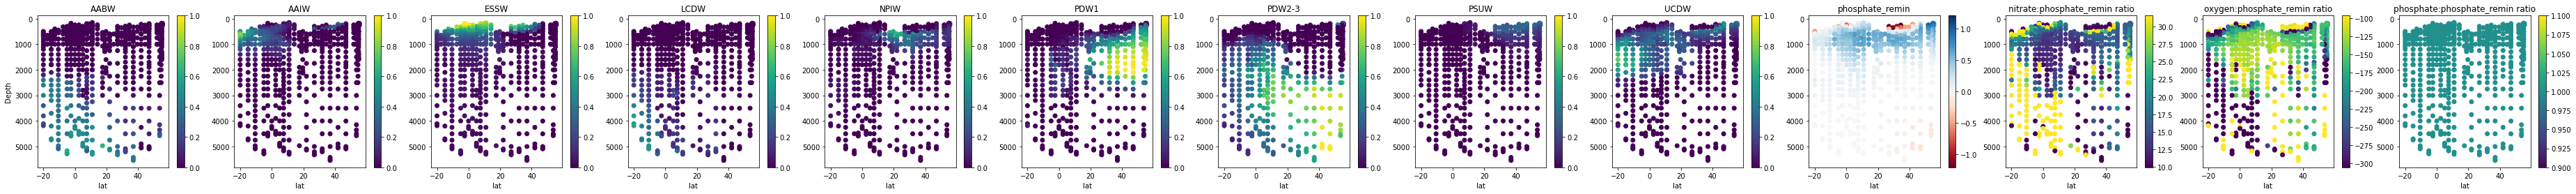

Setting: flexiblereminratio_manyarchetypes


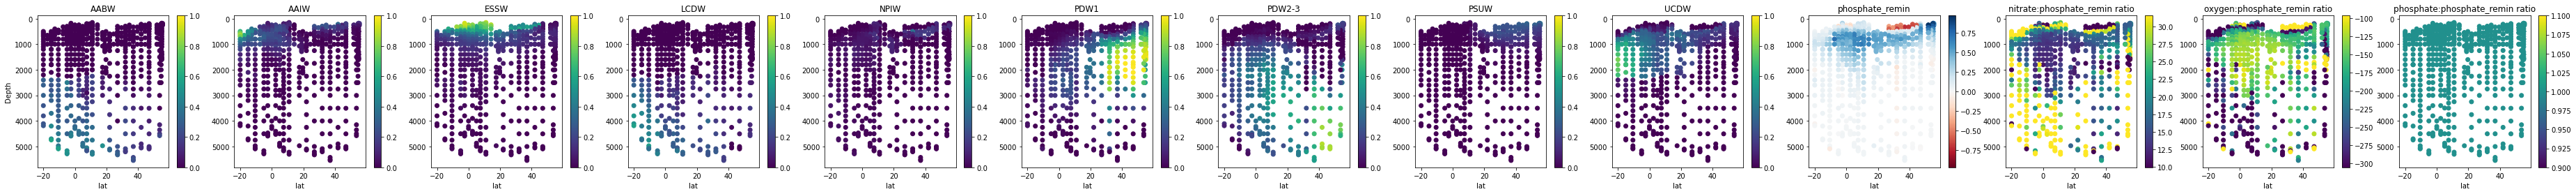

Plotting absolute residuals
Setting: flexiblereminratio_onearchetype


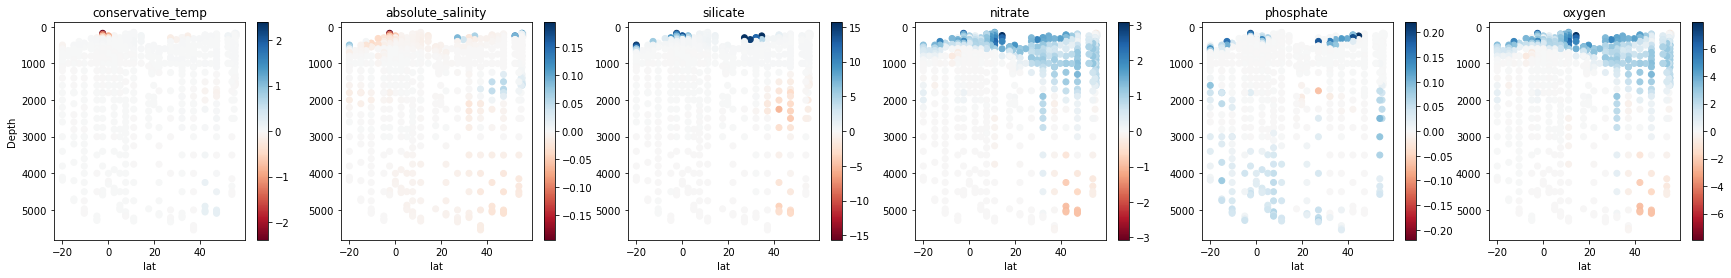

Setting: flexiblereminratio_manyarchetypes


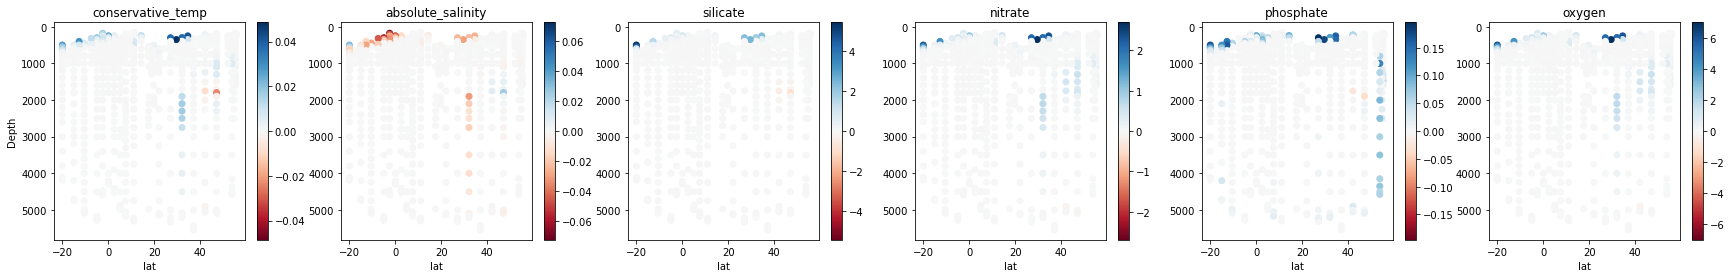

In [39]:
import numpy as np
from matplotlib import pyplot as plt
reload(pyompa)
from pyompa import (plot_ompasoln_endmember_fractions,                       
                    plot_ompasoln_residuals,                                 
                    plot_ompasoln_endmember_usagepenalties)


print("Plotting endmember fractions")
for setting in intermediateanddeep_settingtosoln:
    print("Setting:", setting)
    ompa_soln = intermediateanddeep_settingtosoln[setting]
    plot_ompasoln_endmember_fractions(ompa_soln=ompa_soln,
                                      xaxis_colname="lat",
                                      yaxis_colname="Depth",
                                      group_endmembers=True)


print("Plotting absolute residuals")
for setting in intermediateanddeep_settingtosoln:
    print("Setting:", setting)
    ompa_soln = intermediateanddeep_settingtosoln[setting]
    plot_ompasoln_residuals(ompa_soln=ompa_soln,
                            xaxis_colname="lat",
                            yaxis_colname="Depth")

AABW
original


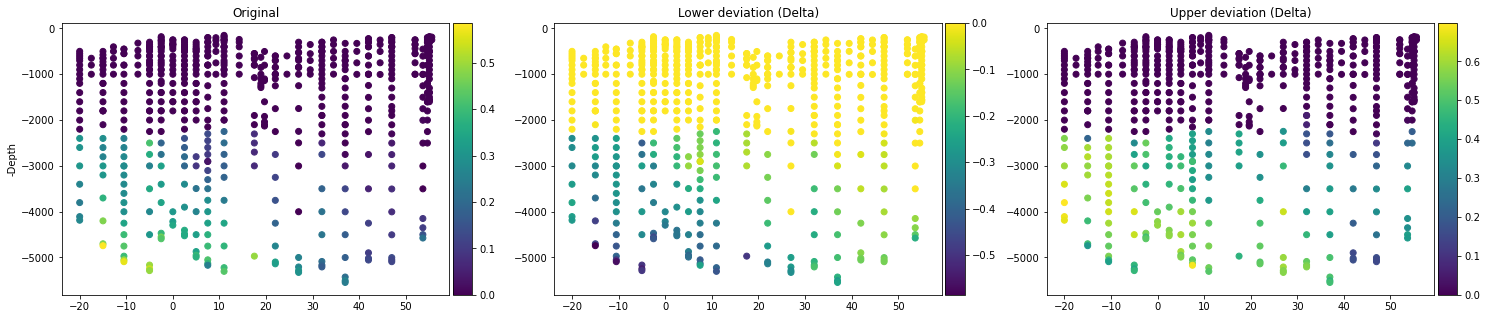

AAIW
original


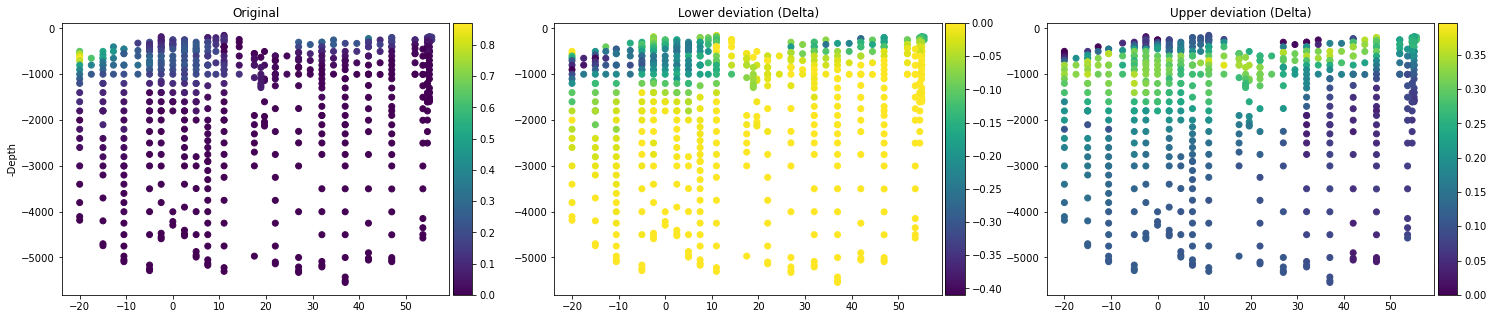

ESSW
original


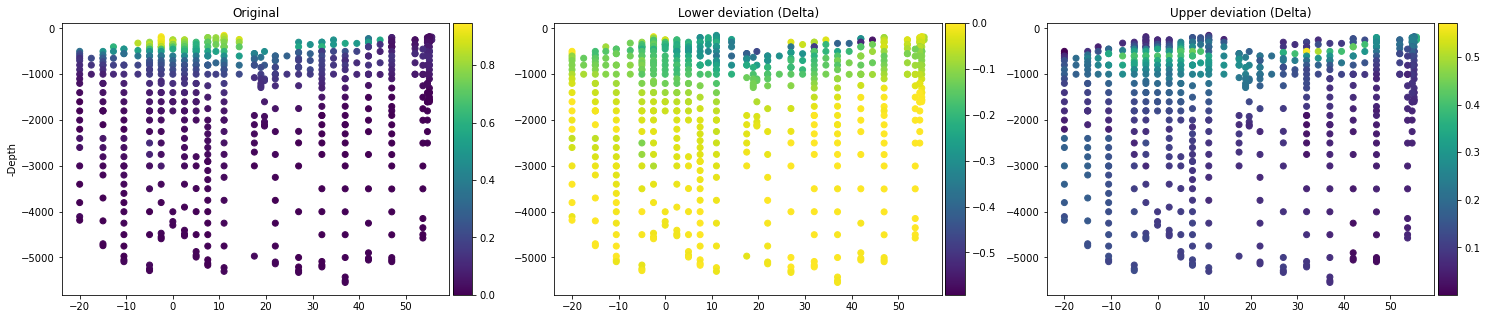

LCDW
original


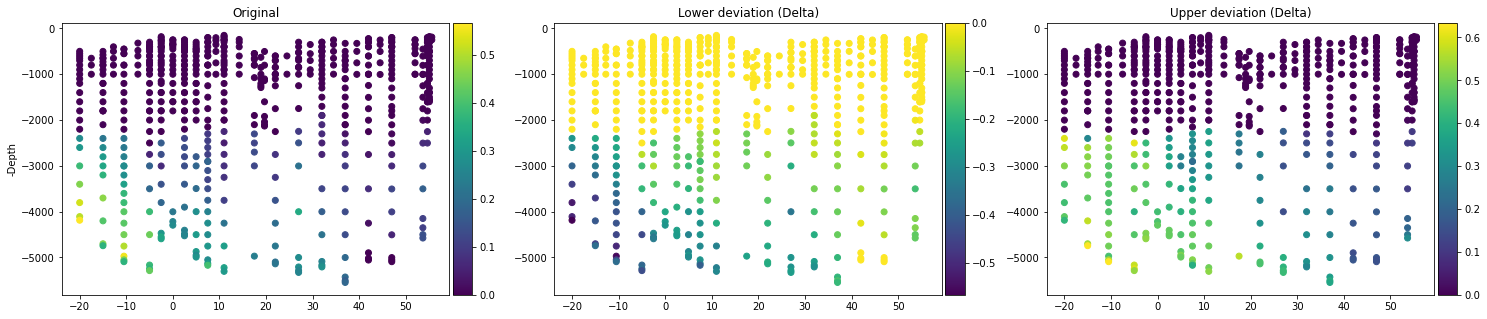

NPIW
original


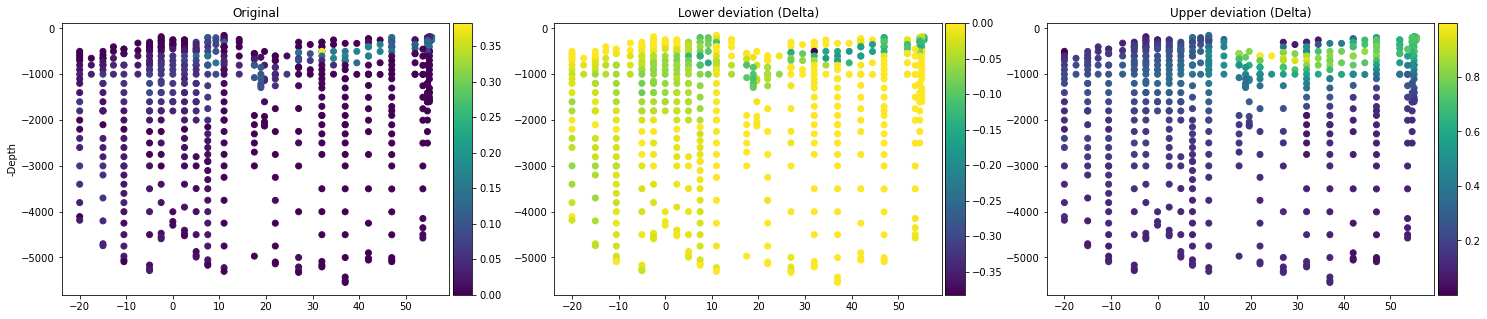

PDW1
original


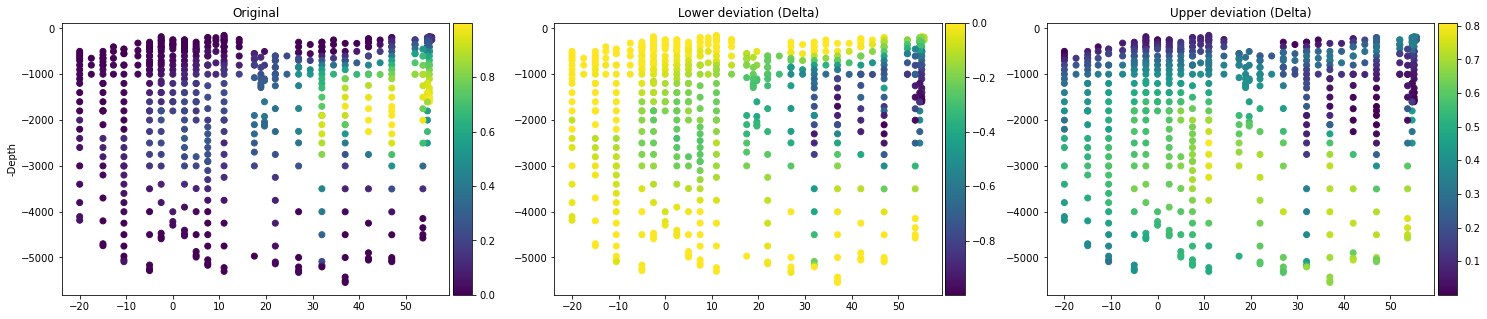

PDW2-3
original


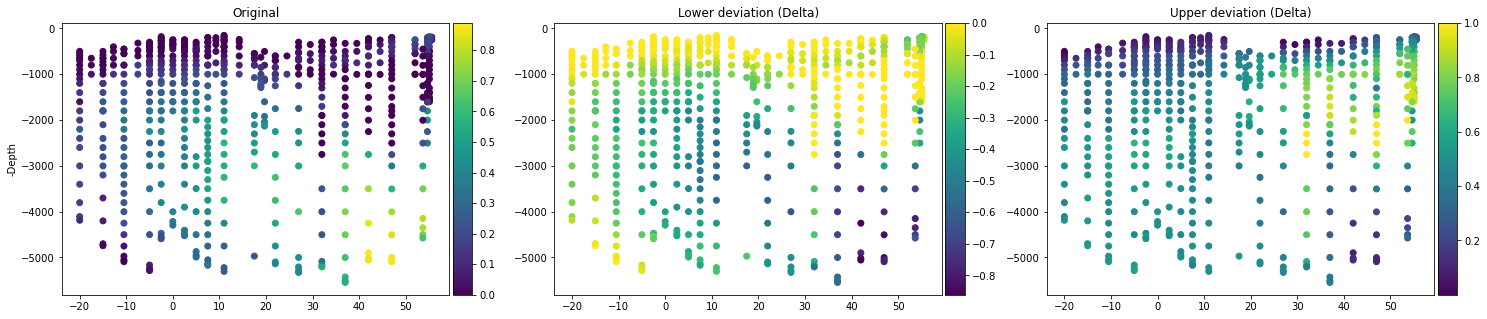

PSUW
original


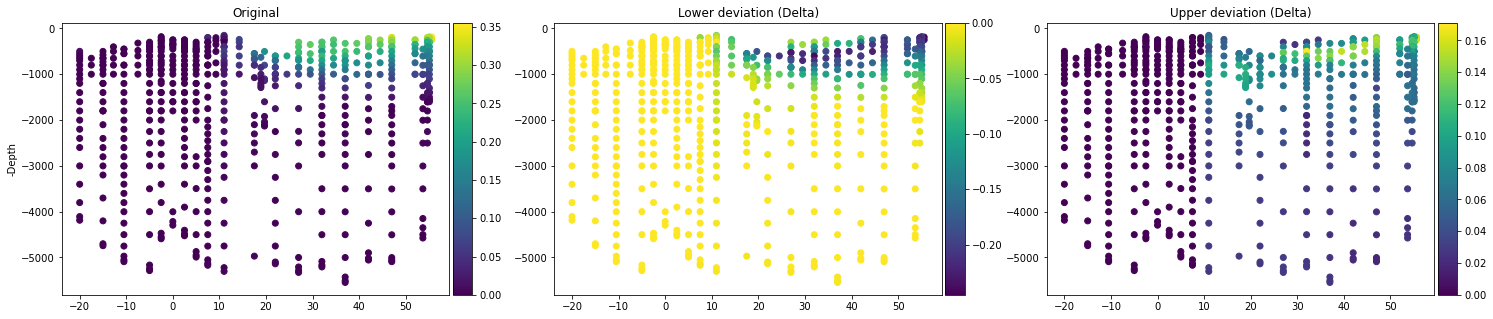

UCDW
original


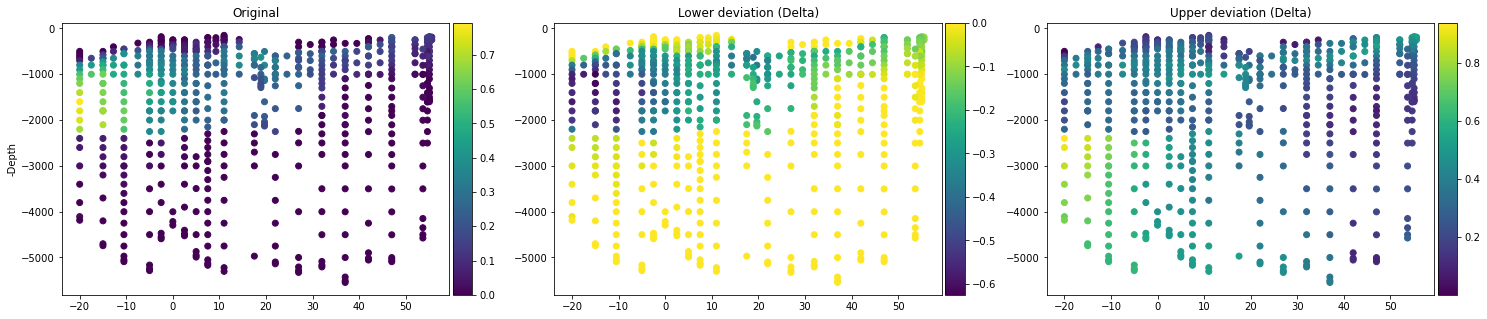

In [41]:
#quantify variation in min/max for each endmember and the remineralization amount
from mpl_toolkits.axes_grid1 import make_axes_locatable
reload(pyompa)
from pyompa.util import collapse_endmembers_by_idxmapping
from pyompa.plotting import plot_residuals

soln = intermediateanddeep_settingtosoln["flexiblereminratio_manyarchetypes"]

max_resids = np.array([0.01, 0.04, 4, 1, 0.15, 2])

for endmemberoverallidx, (endmembername, endmember_idxs) in enumerate(soln.endmembername_to_indices.items()):
    if (True):#endmembername in ["ESSW"]):
        maximizing_obj = np.zeros((len(soln.endmember_names) + soln.ompa_problem.num_converted_variables,))
        maximizing_obj[endmember_idxs] = -1
        
        (new_emfracs, _, maxwm, new_resids_max) = pyompa.ompacore.OMPASoln.core_quantify_ambiguity_via_residual_limits(
                                      self=soln, obj_weights=maximizing_obj,
                                      max_resids=max_resids)

        minimizing_obj = np.zeros((len(soln.endmember_names) + soln.ompa_problem.num_converted_variables,))
        minimizing_obj[endmember_idxs] = 1
        (new_emfracs, _, minwm, new_resids_min) = pyompa.ompacore.OMPASoln.core_quantify_ambiguity_via_residual_limits(
                                      self=soln, obj_weights=minimizing_obj, max_resids=max_resids)

        collapsed_fractions = collapse_endmembers_by_idxmapping(soln.endmember_fractions,
                                                                soln.endmembername_to_indices)

        print(endmembername)
        print("original")
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
        origscatter = ax[0].scatter(soln.obs_df["lat"], -soln.obs_df["Depth"],
                                    c=collapsed_fractions[:,endmemberoverallidx])
        divider = make_axes_locatable(ax[0])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(origscatter, cax=cax)
        ax[0].set_title("Original")
        ax[0].set_ylabel("-Depth")

        lowerscatter = ax[1].scatter(soln.obs_df["lat"], -soln.obs_df["Depth"],
                       c=minwm - collapsed_fractions[:,endmemberoverallidx] )
        divider = make_axes_locatable(ax[1])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(lowerscatter, cax=cax)
        ax[1].set_title("Lower deviation (Delta)")

        upperscatter = ax[2].scatter(soln.obs_df["lat"], -soln.obs_df["Depth"],
                               c=-maxwm - collapsed_fractions[:,endmemberoverallidx])
        divider = make_axes_locatable(ax[2])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(upperscatter, cax=cax)
        ax[2].set_title("Upper deviation (Delta)")

        plt.show()

        #plot_residuals(param_residuals=new_resids_max, param_names=soln.param_names,
        #               xaxis_vals=soln.obs_df["lat"], xaxis_label="lat",
        #               yaxis_vals=soln.obs_df["Depth"], yaxis_label="Depth")
        #plot_residuals(param_residuals=new_resids_min, param_names=soln.param_names,
        #               xaxis_vals=soln.obs_df["lat"], xaxis_label="lat",
        #               yaxis_vals=soln.obs_df["Depth"], yaxis_label="Depth")



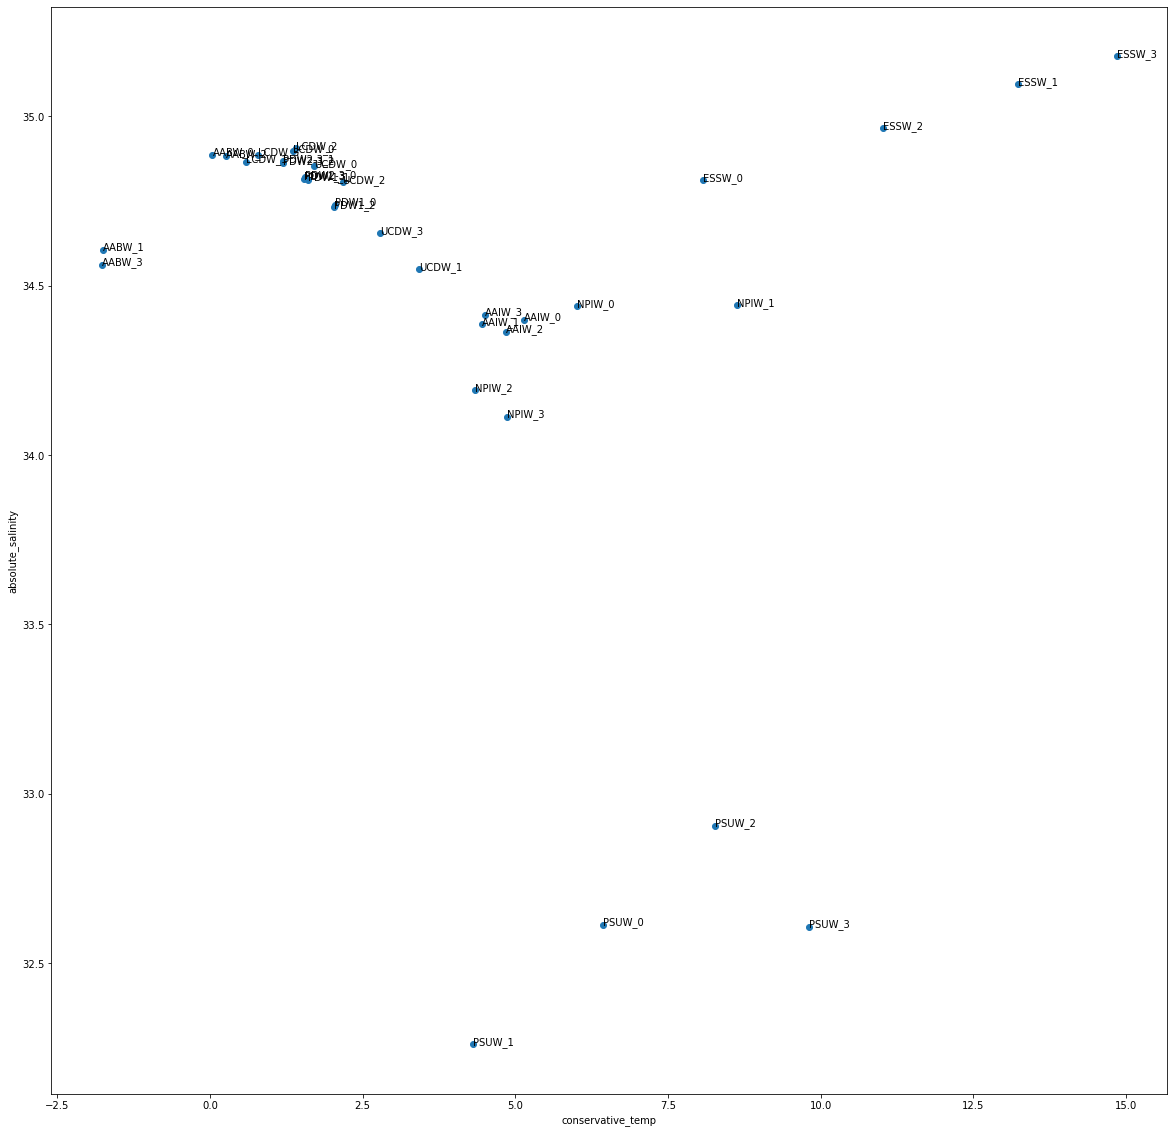

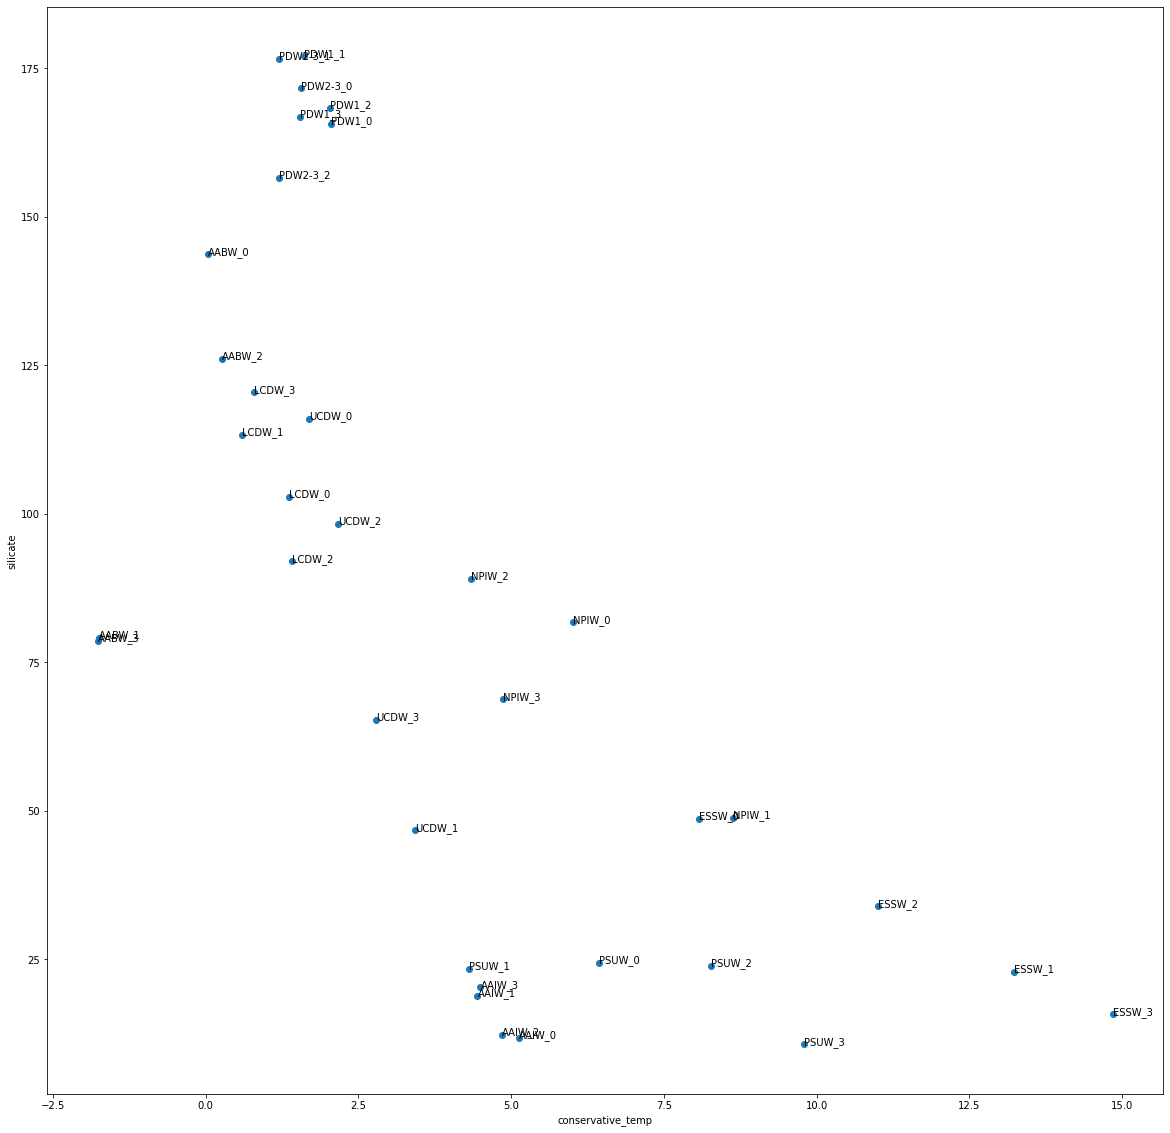

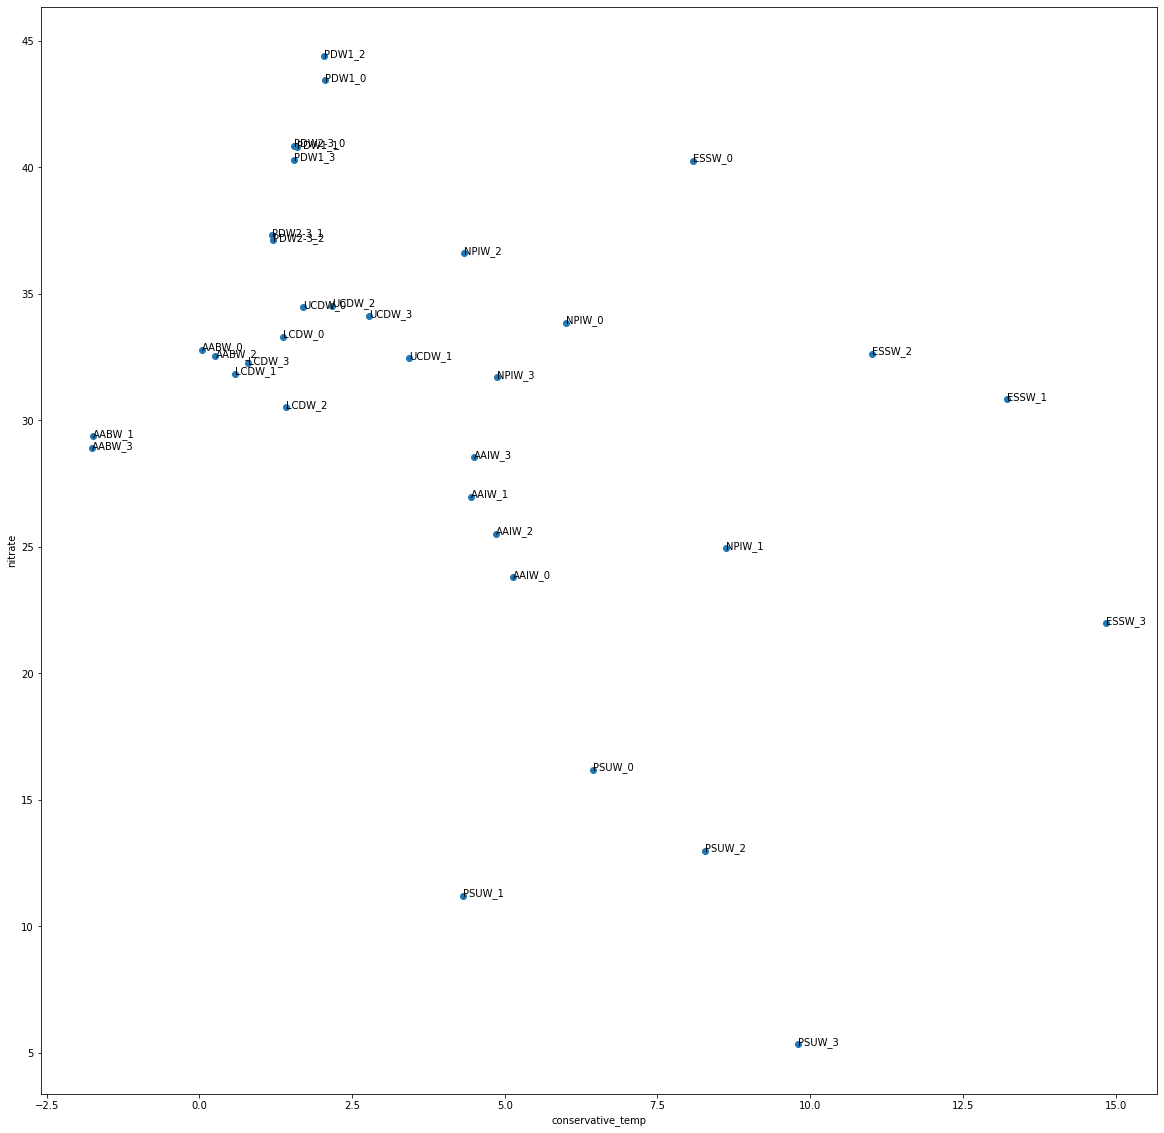

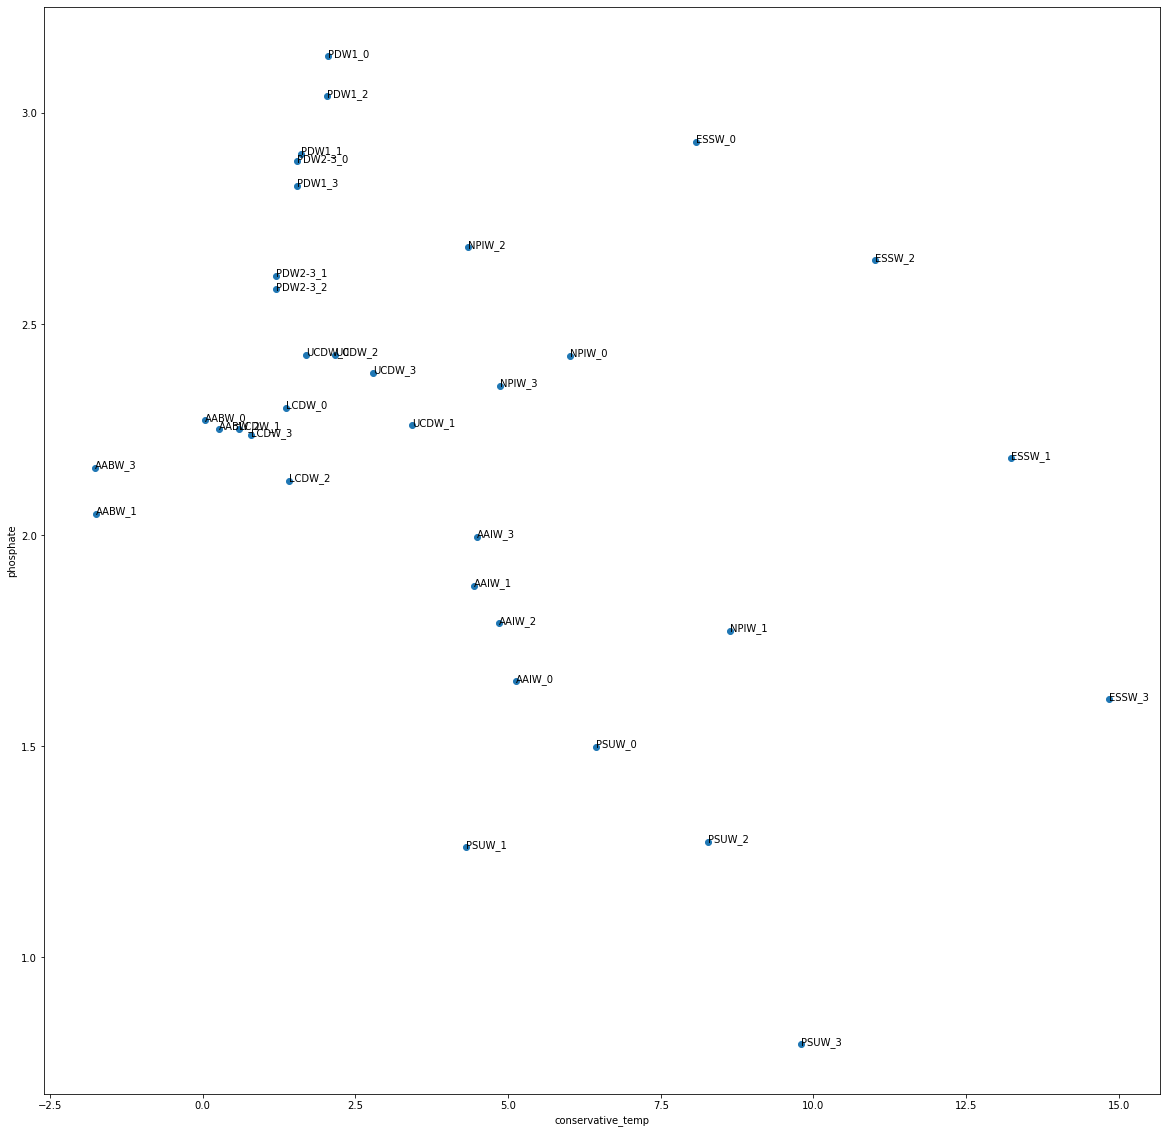

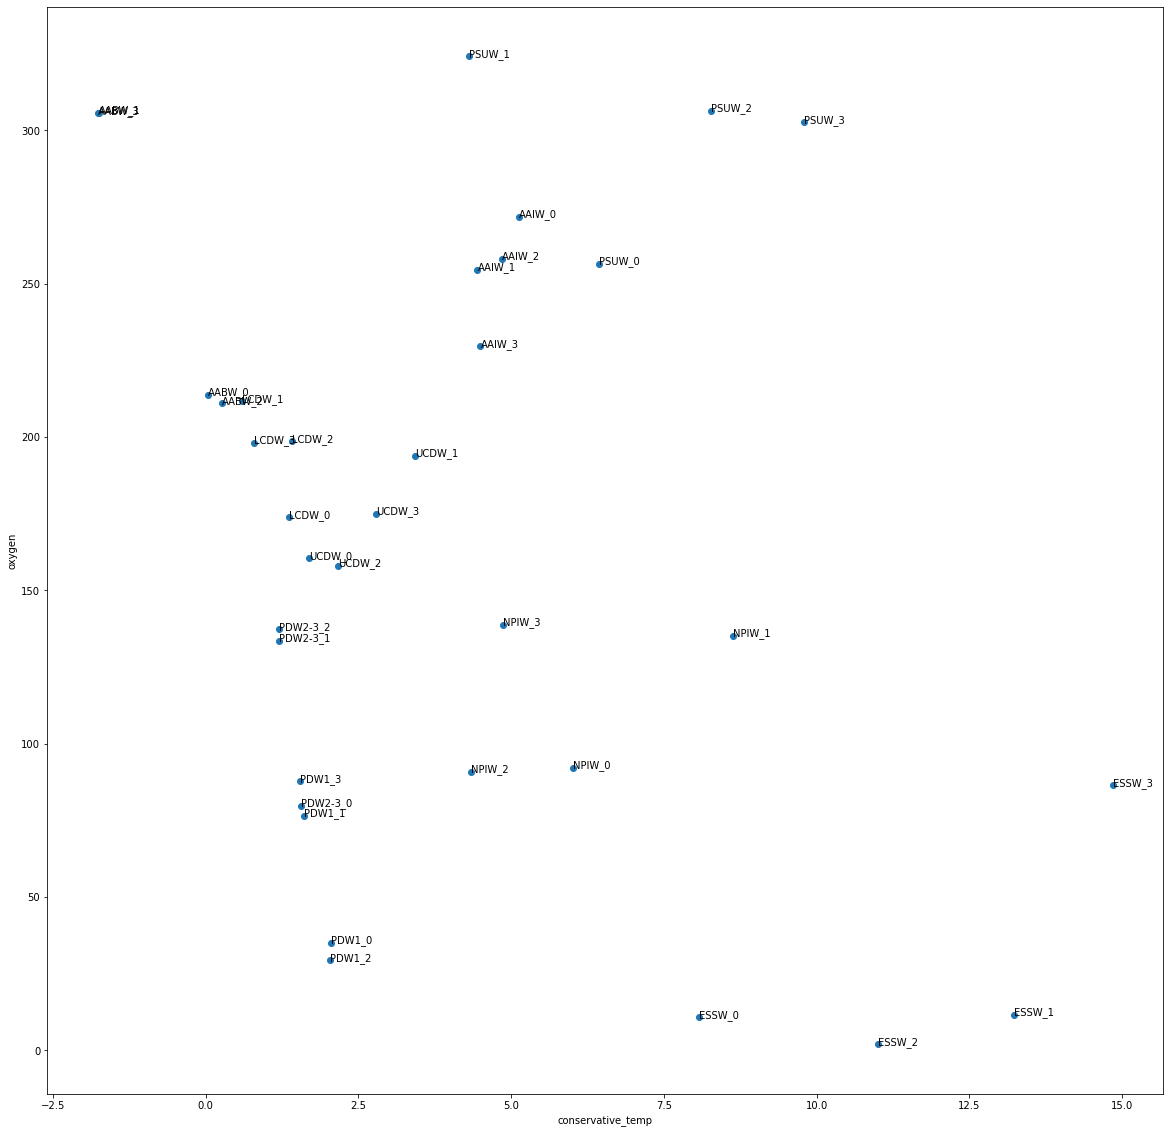

In [42]:
features = ["conservative_temp", "absolute_salinity", "silicate",
            "nitrate", "phosphate", "oxygen"]

for otherfeatureidx in range(1,len(features)):
    otherfeature = features[otherfeatureidx]
    feature1vals = endmember_df[features[0]]
    feature2vals = endmember_df[features[otherfeatureidx]]
    endmember_names = endmember_df["watermass_name"]
    
    plt.figure(figsize=(20,20))
    
    ax = plt.gca()
    
    for i, txt in enumerate(endmember_names):
        ax.annotate(txt, (feature1vals[i], feature2vals[i]))    
    plt.scatter(feature1vals, feature2vals)
    plt.xlabel(features[0])
    plt.ylabel(features[otherfeatureidx])
    plt.show()